## Sentiment Analysis in Financial Markets
### Exploratory Data Analysis

Analyze news articles, financial reports, or social media to gauge market sentiment. This project would involve natural language processing (NLP) techniques to understand how sentiment affects stock prices.

### Stocks to focus on 

- Tesla (Tsla)

- Apple Inc. (AAPL)

- Amazon.com Inc. (AMZN)

- Alphabet Inc. (GOOGL)

- Microsoft Corporation (MSFT)

- Facebook, Inc. (META)

- JPMorgan Chase & Co. (JPM)

- NVIDIA Corporation (NVDA)


### Stock Market History Data - data cleansing 

In [9]:
#import yfinance as yf
import pandas as pd

In [10]:
df_stocks=pd.read_csv('data/stocks/df_stocks.csv', sep=",")
#df_stocks.drop(index=1, inplace=True)
df_stocks.head(3)

,Unnamed: 0,Date,Stock,Open,Low,Close,Adjusted_Close,Volume,Month,Price_Change_Pct,Adjusted_Close_Change
0,0,2010-01-04,AAPL,7.660714,7.585000,7.643214,6.479000,493729600.0,1,NaN,NaN
1,1,2010-01-04,AMZN,6.830500,6.657000,6.695000,6.695000,151998000.0,1,NaN,NaN
2,2,2010-01-04,GOOG,15.678981,15.547723,15.610239,15.610239,78541293.0,1,NaN,NaN


In [11]:
df_stocks = df_stocks[df_stocks['Stock'] == 'MSFT']

In [ ]:
df_stocks.columns = ['Date', 'Stock', 'Open', 'Low', 'Close', 'Adjusted_Close', 'Volume']                                           

df_stocks.head()

In [12]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3522 entries, 3 to 17486
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3522 non-null   int64  
 1   Date                   3522 non-null   object 
 2   Stock                  3522 non-null   object 
 3   Open                   3522 non-null   float64
 4   Low                    3522 non-null   float64
 5   Close                  3522 non-null   float64
 6   Adjusted_Close         3522 non-null   float64
 7   Volume                 3522 non-null   float64
 8   Month                  3522 non-null   int64  
 9   Price_Change_Pct       3521 non-null   float64
 10  Adjusted_Close_Change  3521 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 330.2+ KB


### Stock Market History Data - EDA 

In [13]:
df_stocks.describe()

,Unnamed: 0,Open,Low,Close,Adjusted_Close,Volume,Month,Price_Change_Pct,Adjusted_Close_Change
count,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000,3.522000e+03,3522.000000,3521.000000,3521.000000
mean,8685.630324,116.392172,114.081403,115.293921,109.983077,3.727788e+07,6.545997,0.084315,0.000921
std,5080.701375,102.855631,100.714645,101.837071,102.656432,2.105607e+07,3.425395,1.635127,0.016334
min,3.000000,23.320000,22.730000,23.010000,17.613329,7.425600e+06,1.000000,-14.739031,-0.147390
25%,4282.250000,33.335001,32.660001,33.022500,27.421297,2.352038e+07,4.000000,-0.724267,-0.007166
50%,8683.500000,63.100000,62.289999,62.660000,57.211771,3.141700e+07,7.000000,0.063845,0.000683
75%,13084.750000,203.549995,197.272495,201.122501,194.997337,4.576332e+07,10.000000,0.920503,0.009255
max,17486.000000,384.299988,378.160004,382.700012,382.700012,3.193179e+08,12.000000,14.216888,0.142169


#### Closing Price over the years 

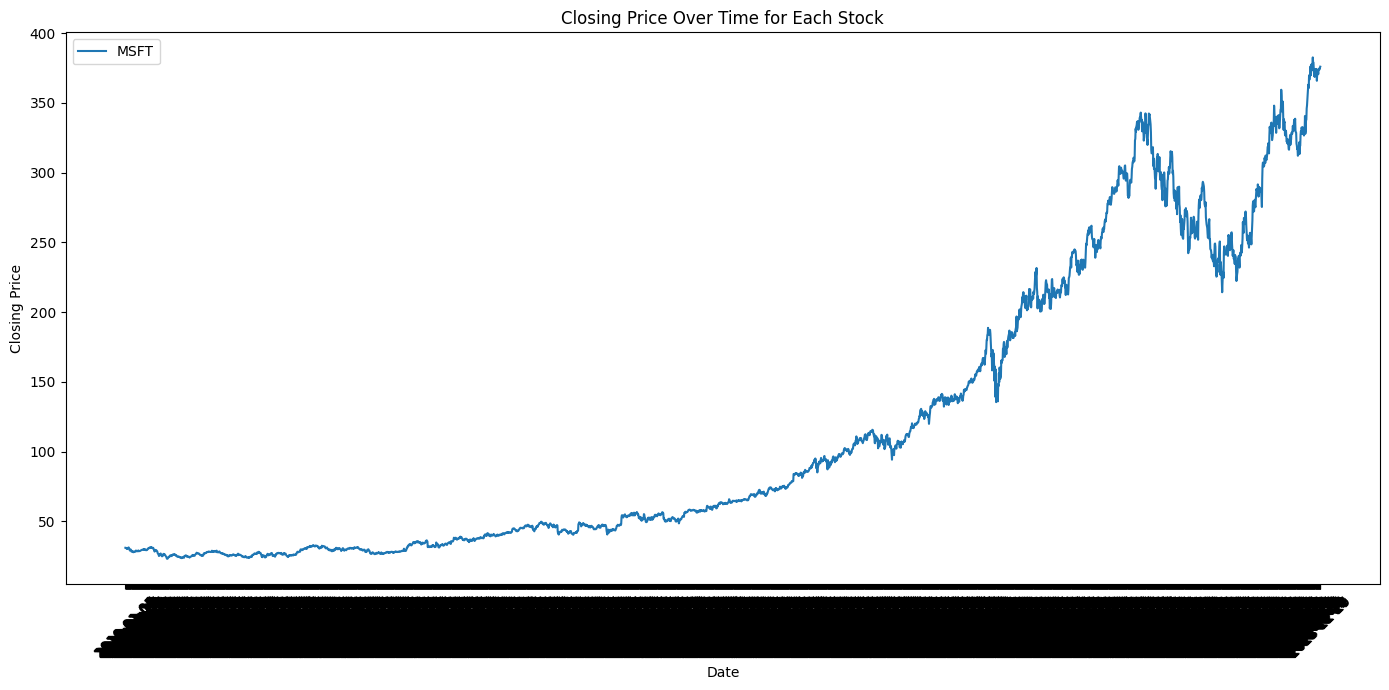

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series Plot for each stock's closing price
plt.figure(figsize=(14, 7))
for stock in df_stocks['Stock'].unique():
    subset = df_stocks[df_stocks['Stock'] == stock]
    plt.plot(subset['Date'], subset['Close'], label=stock)

plt.title('Closing Price Over Time for Each Stock')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

#### Volume over the years 

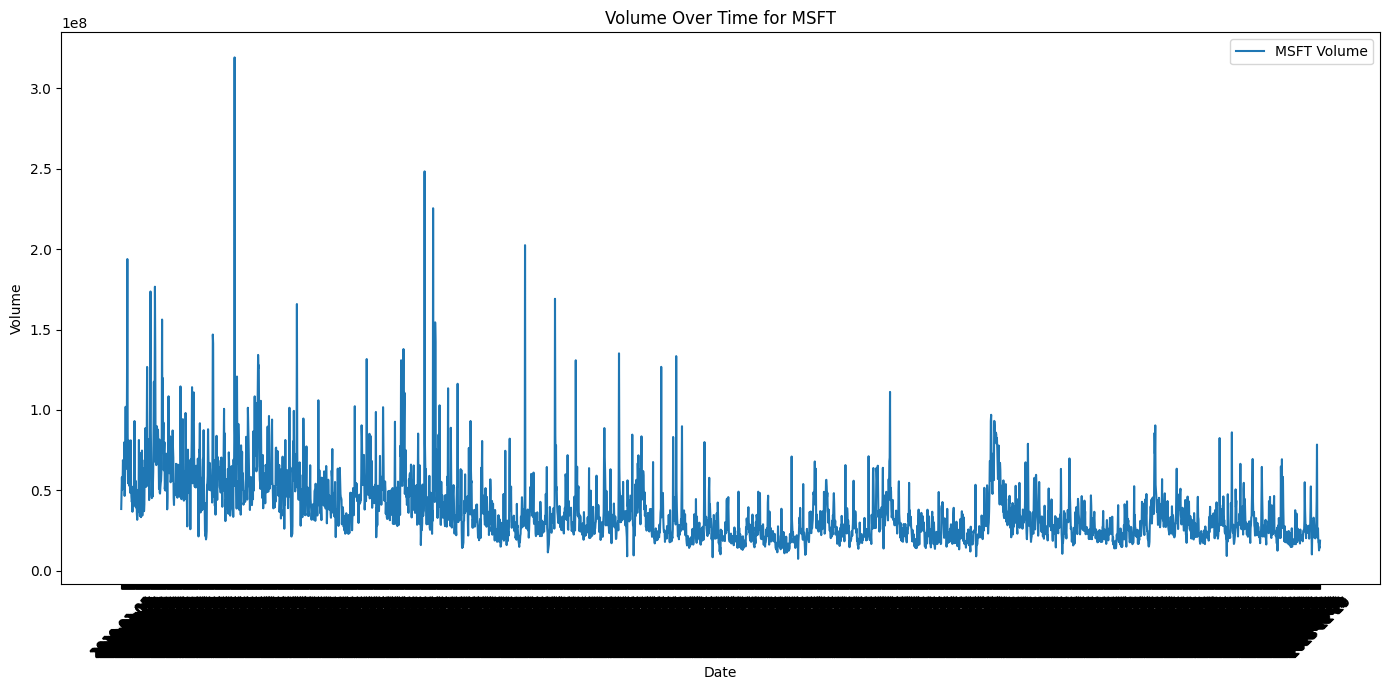

In [15]:
# Assuming df_stocks is your DataFrame and it has been properly formatted
unique_stocks = df_stocks['Stock'].unique()
n_stocks = len(unique_stocks)

# Set up the matplotlib figure
fig, axes = plt.subplots(n_stocks, 1, figsize=(14, 7*n_stocks)) # Adjust the size as needed

for i, stock in enumerate(unique_stocks):
    subset = df_stocks[df_stocks['Stock'] == stock]
    ax = axes[i] if n_stocks > 1 else axes
    ax.plot(subset['Date'], subset['Volume'], label=f'{stock} Volume')
    ax.set_title(f'Volume Over Time for {stock}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Volume')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()

In [16]:
import pandas as pd
import numpy as np
corr = df_stocks[['Open', 'Low', 'Close', 'Adjusted_Close', 'Volume']].corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,Open,Low,Close,Adjusted_Close,Volume
Open,1.000000,0.999865,0.999890,0.999840,-0.328489
Low,0.999865,1.000000,0.999898,0.999844,-0.333973
Close,0.999890,0.999898,1.000000,0.999943,-0.331568
Adjusted_Close,0.999840,0.999844,0.999943,1.000000,-0.331185
Volume,-0.328489,-0.333973,-0.331568,-0.331185,1.000000


Open, Low, Close, and Adjusted_Close prices are highly positively correlated with each other, simce because they are all measures of stock prices within the same trading day.

#### Moving Averages


##### 30-day

In [19]:
# Calculate 30-day Moving Averages for the Closing Prices of each stock
df_stocks['30_day_MA'] = df_stocks.groupby('Stock')['Close'].transform(lambda x: x.rolling(window=30).mean())

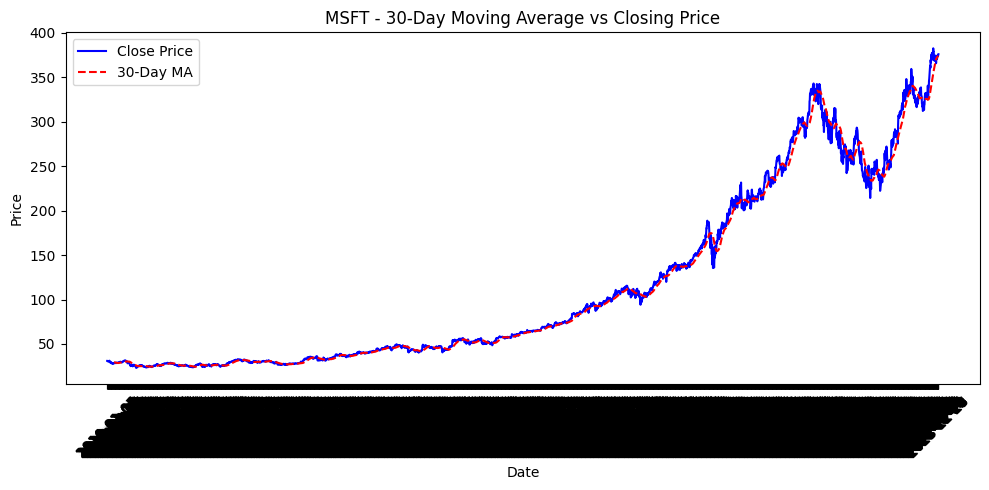

In [20]:
stocks = df_stocks['Stock'].unique()

# Creating a separate plot for each stock
for stock in stocks:
    subset = df_stocks[df_stocks['Stock'] == stock]
    
    plt.figure(figsize=(10, 5))
    plt.plot(subset['Date'], subset['Close'], label='Close Price', color='blue')
    plt.plot(subset['Date'], subset['30_day_MA'], label='30-Day MA', linestyle='--', color='red')
    
    plt.title(f'{stock} - 30-Day Moving Average vs Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### 60-day

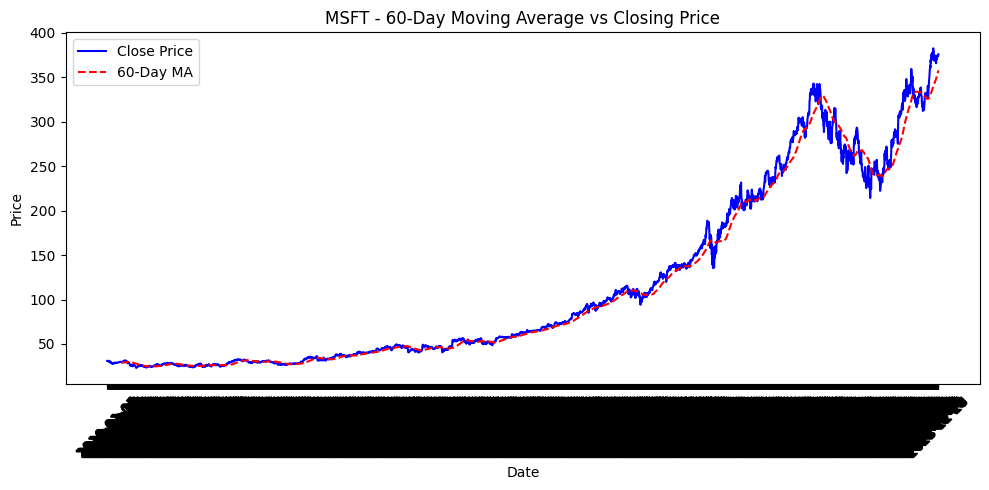

In [21]:
# Calculate 60-day Moving Averages for the Closing Prices of each stock
df_stocks['60_day_MA'] = df_stocks.groupby('Stock')['Close'].transform(lambda x: x.rolling(window=60).mean())

stocks = df_stocks['Stock'].unique()

# Creating a separate plot for each stock
for stock in stocks:
    subset = df_stocks[df_stocks['Stock'] == stock]
    
    plt.figure(figsize=(10, 5))
    plt.plot(subset['Date'], subset['Close'], label='Close Price', color='blue')
    plt.plot(subset['Date'], subset['60_day_MA'], label='60-Day MA', linestyle='--', color='red')
    
    plt.title(f'{stock} - 60-Day Moving Average vs Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### 90-day

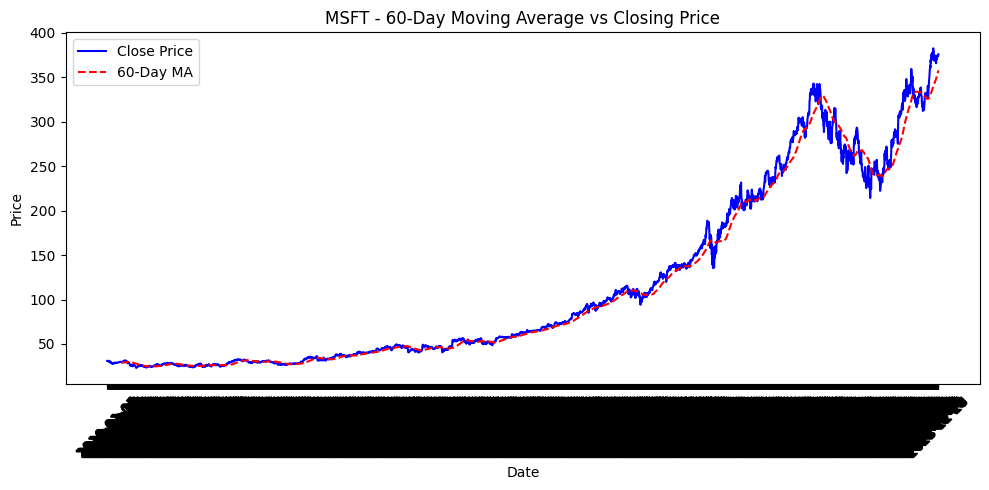

In [22]:
# Calculate 60-day Moving Averages for the Closing Prices of each stock
df_stocks['90_day_MA'] = df_stocks.groupby('Stock')['Close'].transform(lambda x: x.rolling(window=90).mean())

stocks = df_stocks['Stock'].unique()

# Creating a separate plot for each stock
for stock in stocks:
    subset = df_stocks[df_stocks['Stock'] == stock]
    
    plt.figure(figsize=(10, 5))
    plt.plot(subset['Date'], subset['Close'], label='Close Price', color='blue')
    plt.plot(subset['Date'], subset['60_day_MA'], label='60-Day MA', linestyle='--', color='red')
    
    plt.title(f'{stock} - 60-Day Moving Average vs Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [23]:
df_stocks.drop(['30_day_MA', '60_day_MA', '90_day_MA'], axis=1, inplace=True)


#### Seasonality Analysis

In [26]:
df_seasonality =  df_stocks

In [27]:
# Resample data to monthly and calculate average closing price for each stock
df_seasonality['Month'] = df_seasonality['Date'].dt.month
monthly_avg = df_seasonality.groupby(['Stock', 'Month'])['Close'].mean().unstack(level=0)

# Plot the monthly average closing price for each stock
monthly_avg.plot(figsize=(14, 7), marker='o')
plt.title('Average Monthly Closing Price by Stock')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Stock')
plt.tight_layout()
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

#### Outliers

##### Box plot 

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

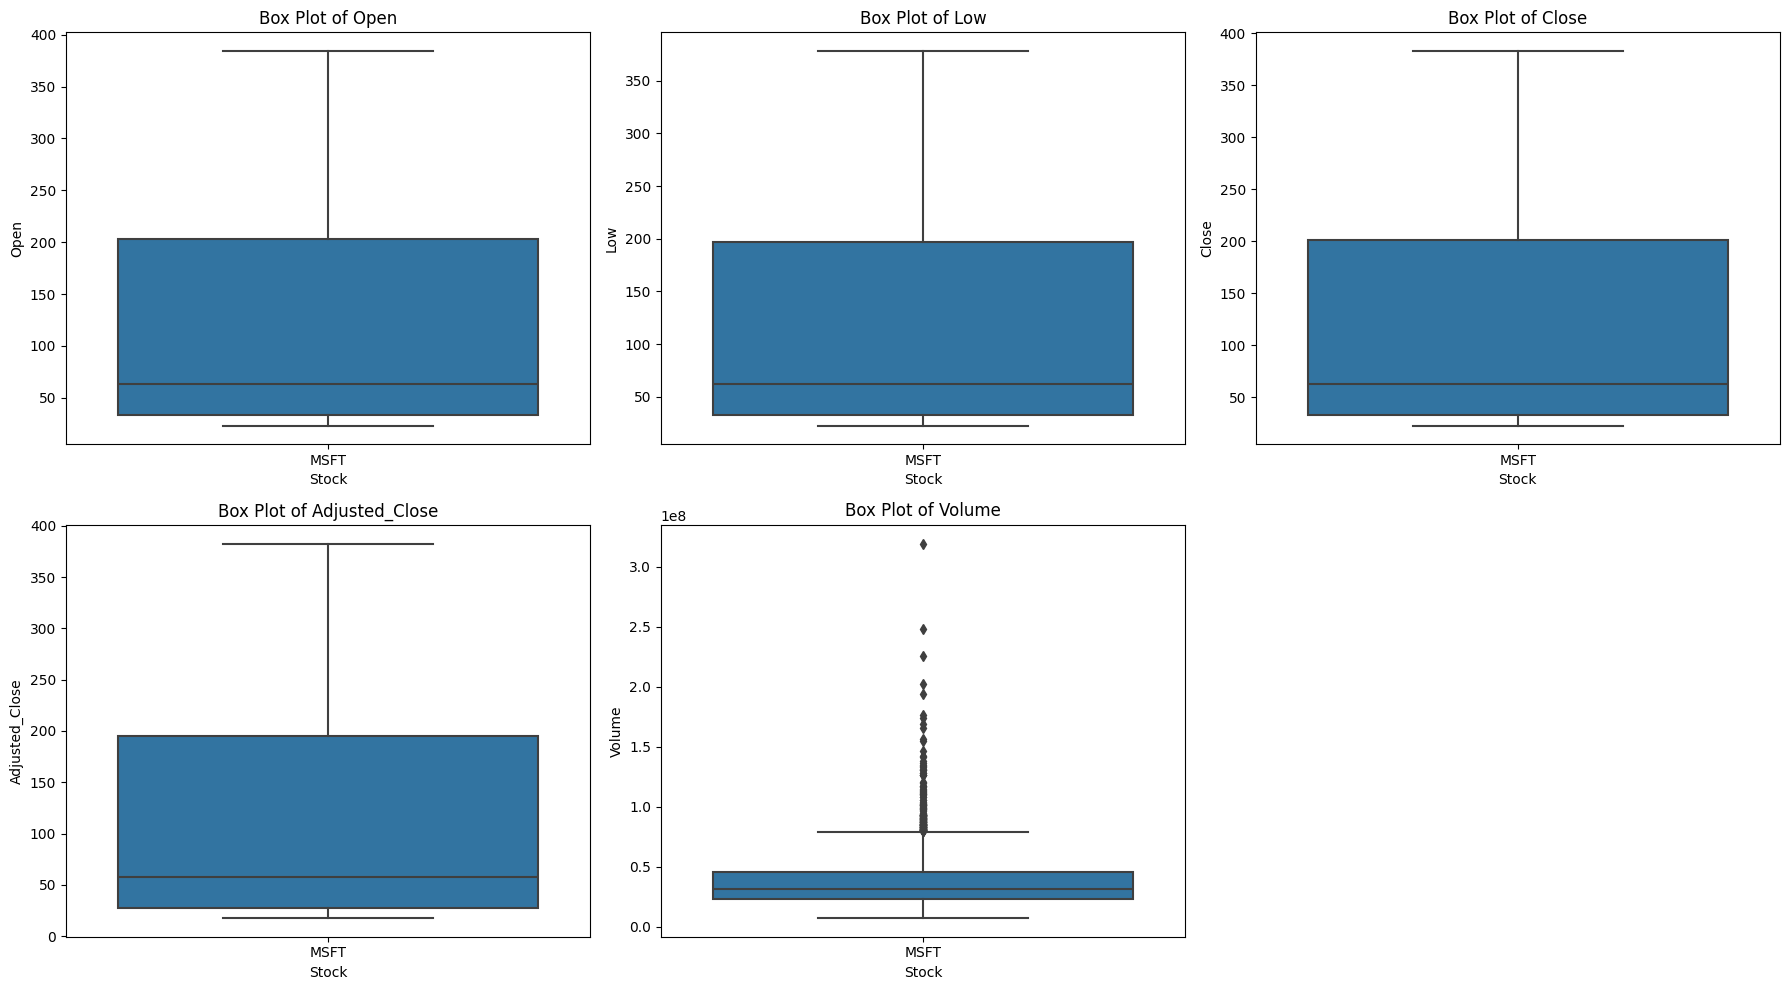

In [28]:
# Box Plots for Numerical Features to Identify Outliers

plt.figure(figsize=(18, 10))

# Creating a subplot for each numerical feature
for i, column in enumerate(['Open', 'Low', 'Close', 'Adjusted_Close', 'Volume'], start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Stock', y=column, data=df_stocks)
    plt.title(f'Box Plot of {column}')
    plt.xlabel('Stock')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


##### Volatility- Daily Price changes 

TypeError: 'Axes' object is not subscriptable

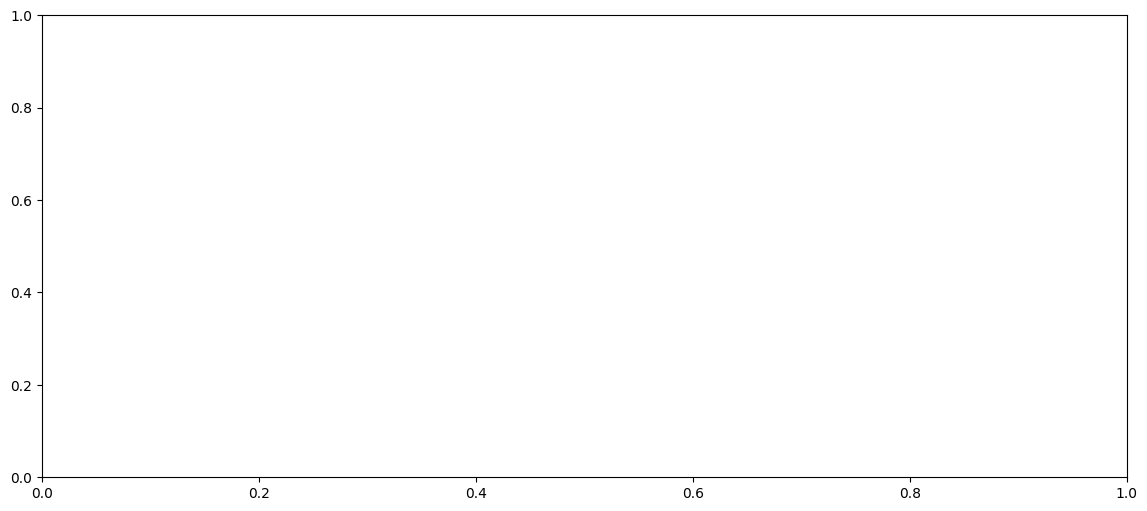

In [29]:
df_stocks_volatility = df_stocks

# Calculating daily price change percentage for each stock
df_stocks_volatility['Price_Change_Pct'] = df_stocks_volatility.groupby('Stock')['Close'].pct_change() * 100


stocks = df_stocks_volatility['Stock'].unique()
num_stocks = len(stocks)
fig, axes = plt.subplots(num_stocks, 1, figsize=(14, 6 * num_stocks))

for i, stock in enumerate(stocks):
    subset = df_stocks_volatility[df_stocks_volatility['Stock'] == stock]
    axes[i].plot(subset['Date'], subset['Price_Change_Pct'], label=f'{stock} Price Change', marker='o', linestyle='-', markersize=4)
    axes[i].set_title(f'{stock} - Daily Price Change Percentage')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price Change (%)')
    axes[i].legend()
    axes[i].axhline(0, color='black', linewidth=0.5)  # Reference line at 0%
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


2020 to the present

C:\Users\ethan\AppData\Local\Temp\ipykernel_22532\4195495870.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stocks_volatility['Price_Change_Pct'] = df_stocks_volatility.groupby('Stock')['Close'].pct_change() * 100


TypeError: 'Axes' object is not subscriptable

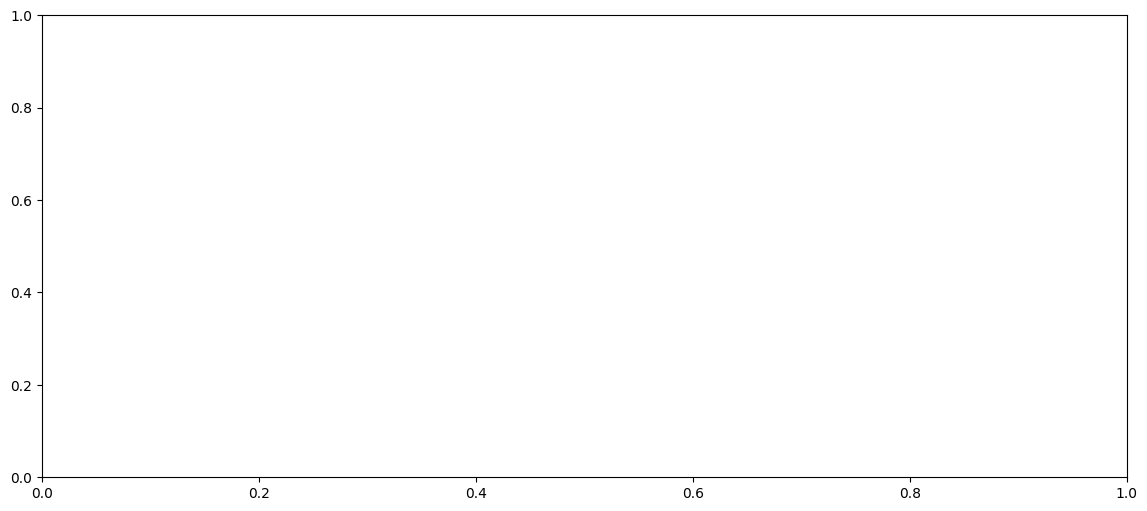

In [30]:
# Filtering for dates from 2020 to the present
df_stocks_volatility = df_stocks_volatility[df_stocks_volatility['Date'] >= '2020-01-01']

# Calculating daily price change percentage for each stock
df_stocks_volatility['Price_Change_Pct'] = df_stocks_volatility.groupby('Stock')['Close'].pct_change() * 100


stocks = df_stocks_volatility['Stock'].unique()
num_stocks = len(stocks)
fig, axes = plt.subplots(num_stocks, 1, figsize=(14, 6 * num_stocks))

for i, stock in enumerate(stocks):
    subset = df_stocks_volatility[df_stocks_volatility['Stock'] == stock]
    axes[i].plot(subset['Date'], subset['Price_Change_Pct'], label=f'{stock} Price Change', marker='o', linestyle='-', markersize=4)
    axes[i].set_title(f'{stock} - Daily Price Change Percentage')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price Change (%)')
    axes[i].legend()
    axes[i].axhline(0, color='black', linewidth=0.5)  # Reference line at 0%
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Stock Performance Comparison

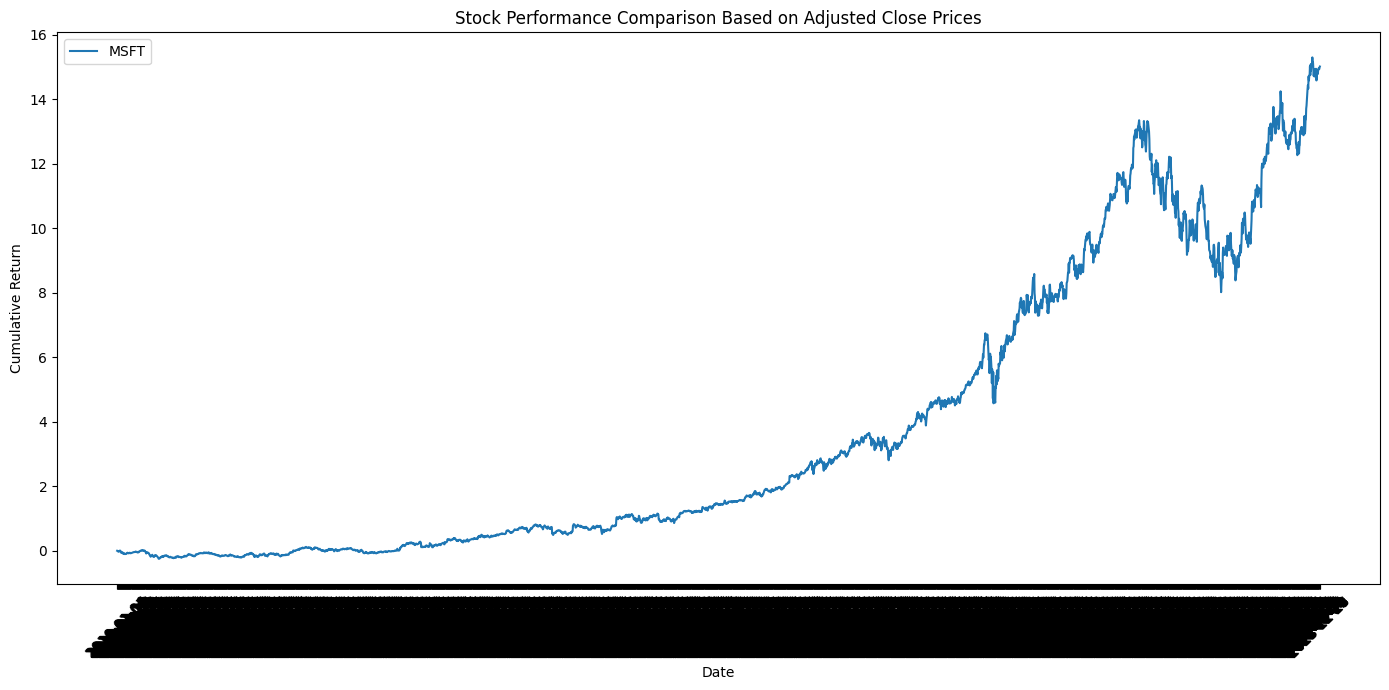

In [31]:
plt.figure(figsize=(14, 7))

# Calculate the percentage change in Adjusted Close price
df_stocks['Adjusted_Close_Change'] = df_stocks.groupby('Stock')['Adjusted_Close'].pct_change()

# Plot the cumulative product of percentage changes to compare performance over time
for stock in df_stocks['Stock'].unique():
    subset = df_stocks[df_stocks['Stock'] == stock]
    # Calculate cumulative return
    cumulative_return = (1 + subset['Adjusted_Close_Change']).cumprod() - 1
    plt.plot(subset['Date'], cumulative_return, label=stock)

plt.title('Stock Performance Comparison Based on Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Volume vs. Price Movements

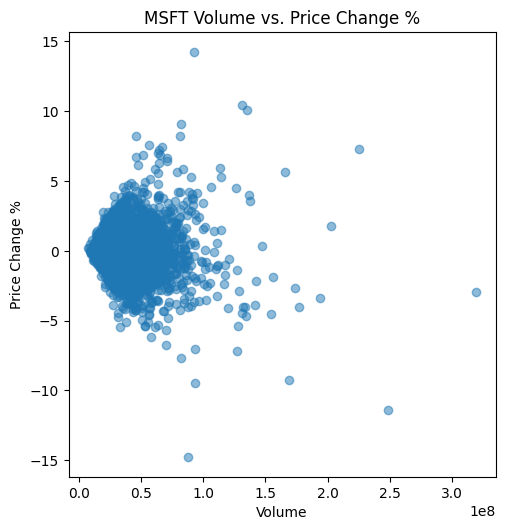

Stock
MSFT   -0.070357
dtype: float64

In [32]:
# Calculate the day's price change percentage
df_stocks['Price_Change_Pct'] = df_stocks.groupby('Stock')['Close'].pct_change() * 100

# Scatter plot for each stock showing volume vs. price change percentage
plt.figure(figsize=(14, 10))

for i, stock in enumerate(df_stocks['Stock'].unique(), start=1):
    plt.subplot(2, 3, i)
    subset = df_stocks[df_stocks['Stock'] == stock]
    plt.scatter(subset['Volume'], subset['Price_Change_Pct'], alpha=0.5)
    plt.title(f'{stock} Volume vs. Price Change %')
    plt.xlabel('Volume')
    plt.ylabel('Price Change %')

plt.tight_layout()
plt.show()

# Pearson correlation coefficient between volume and price change percentage for each stock
correlation_df = df_stocks.groupby('Stock').apply(lambda x: x[['Volume', 'Price_Change_Pct']].corr().iloc[0, 1])

correlation_df


In [33]:
#df_stocks.to_csv('data/stocks/df_stocks.csv')